In [1]:
import numpy as np

# set problem size
N = 5
E = np.random.normal(0, scale=N/2, size=2**N)

print(E)

[-0.60174256  0.42873243 -2.82121208  2.84046933 -2.71887374 -2.66892177
  5.48143334  0.86680909  1.92428931 -0.7979426   0.84849848 -0.86747911
 -4.60660349  0.6662643  -3.34566072 -4.21897161 -3.4193335  -3.21430785
  1.62914483  2.27475661  0.37378564 -4.59261703 -0.88831133  3.7779573
  1.05309056 -0.04993659  3.44187512 -2.17975278 -4.34553262 -3.78496078
 -1.35194819 -0.42787196]


In [2]:
Tau = 1

# B(t): arbitary function
def scheduleE(time):
    return time/Tau

# A(t): arbitary function
def scheduleG(time):
    return (Tau - time)/Tau

# H(t): Hamiltonian
def create_tfim(time=0, hamiltonian=None):
    # set diagonal part
    v = scheduleE(time)
    if hamiltonian is None:
        hamiltonian = np.diag(v*E)
    else:
        for i in range(2**N):
            hamiltonian[i, i] = v*E[i]
    # set off-diagonal part
    g = -1*scheduleG(time)
    for i in range(2**N):
        for n in range(N):
            j = i ^ (1 << n)
            hamiltonian[i, j] = g
            
    return hamiltonian

In [3]:
print(create_tfim(time=0.5))

[[-0.30087128 -0.5        -0.5        ...  0.          0.
   0.        ]
 [-0.5         0.21436622  0.         ...  0.          0.
   0.        ]
 [-0.5         0.         -1.41060604 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -1.89248039  0.
  -0.5       ]
 [ 0.          0.          0.         ...  0.         -0.67597409
  -0.5       ]
 [ 0.          0.          0.         ... -0.5        -0.5
  -0.21393598]]


In [4]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt

H = None
step = 0.01
time_steps = [step*i for i in range(int(Tau/step) + 1)]

x_data = np.zeros((len(time_steps), 2**N))
y_data = np.zeros((len(time_steps), 2**N))
z_data = np.zeros((len(time_steps), 2**N, 2**N))

for i, t in enumerate(time_steps):
    H = create_tfim(t, H)
    evals_all, evecs_all = eigh(H)
    
    # save data
    for n in range(2**N):
        x_data[i, n] = t
        y_data[i, n] = evals_all[n]
        z_data[i, n] = evecs_all[:, n]


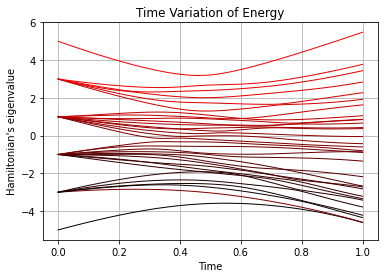

In [5]:
# plot energy data
#color_diff = int(int('0xffffff', 16)/(2**N))
color_diff = 0x8

fig, ax = plt.subplots()

ax.set_xlabel('Time')
ax.set_ylabel("Hamiltonian's eigenvalue")
ax.set_title('Time Variation of Energy')
ax.grid()

for n in range(2**N):
    color_text = "{:0<7}".format(str(hex(color_diff*n%0x0000ff).replace("0x", "#"))) 
    ax.plot(x_data[:,n], y_data[:,n], linewidth=1, color=color_text)

fig.savefig("TimeVariationOfEnergy.png")

<IPython.core.display.Javascript object>


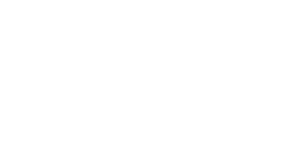

In [6]:
# plot probability data
%matplotlib nbagg

import matplotlib.animation as animation

def amp2prob(vec):
    p = [np.abs(z)**2 for z in vec]
    return np.array(p)

fig = plt.figure()
z_data_prob = np.zeros((len(time_steps), 2**N))

for i in range(len(time_steps)):
    for n in range(2**N):
        z_data_prob[i,:] = amp2prob(z_data[i,n,:])
    
bars = []
x = np.array([i for i in range(2**N)])
for i, t in enumerate(time_steps):
    bar = plt.bar(x, z_data_prob[i], width=0.8, color="#00ccff")
    bars.append(bar)
    
    
ani = animation.ArtistAnimation(fig, bars)

ani.save('TimeVariationOfProbability.gif', writer='pillow')